# Download Dataset

In [0]:
!pip install kaggle
!mkdir ~/.kaggle

import json

token = {"username":"arjuninventor","key":"d64f574889753a2fa936c2518b856acd"}

with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(token, file)
    

In [0]:
!kaggle datasets download -d gavinarmstrong/open-sprayer-images
!unzip open-sprayer-images.zip

# Explore Dataset

Weeds


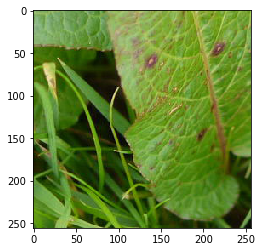

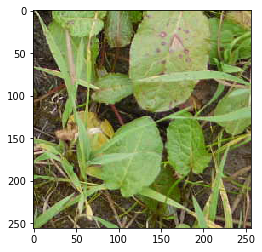

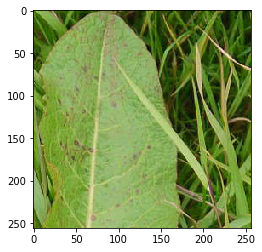

No Weeds


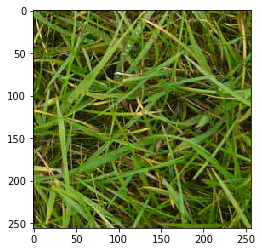

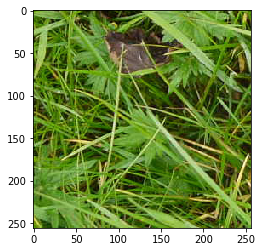

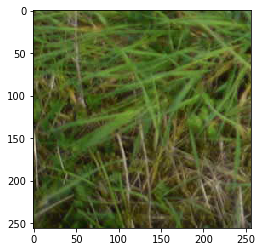

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

weeds=["10001_31869_21227.jpg", "29928_32571_22311.jpg", "23821_25702_17344.jpg"]
no_weeds=["10172_31599_24326.jpg", "10075_25009_31983.jpg", "29322_2259_14313.jpg"]

print("Weeds")
for img in weeds:
    plt.imshow(mpimg.imread("Docknet/train/docks/" + img))
    plt.show()
    
print("No Weeds")
for img in no_weeds:
    plt.imshow(mpimg.imread("Docknet/train/notdocks/" + img))
    plt.show()

# Build Model

In [0]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])



W0711 16:19:23.940822 140397329483648 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0711 16:19:24.248542 140397329483648 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Train & Validate

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        "Docknet/train",  
        target_size=(256, 256), 
        batch_size=10,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'Docknet/valid',
        target_size=(256, 256),
        batch_size=10,
        class_mode='binary')

model.fit_generator(
        train_generator,
        steps_per_epoch=1000,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=500)



Found 6027 images belonging to 2 classes.
Found 670 images belonging to 2 classes.
Epoch 1/10
1000/1000 [==============================] - 785s 785ms/step - loss: 0.4577 - acc: 0.8203 - val_loss: 0.3832 - val_acc: 0.8662
Epoch 2/10
1000/1000 [==============================] - 804s 804ms/step - loss: 0.3567 - acc: 0.8706 - val_loss: 0.3490 - val_acc: 0.8782
Epoch 3/10
1000/1000 [==============================] - 811s 811ms/step - loss: 0.3185 - acc: 0.8906 - val_loss: 0.3076 - val_acc: 0.8996
Epoch 4/10
1000/1000 [==============================] - 809s 809ms/step - loss: 0.2790 - acc: 0.9059 - val_loss: 0.2838 - val_acc: 0.9034
Epoch 5/10
1000/1000 [==============================] - 895s 895ms/step - loss: 0.2273 - acc: 0.9277 - val_loss: 0.3285 - val_acc: 0.8824
Epoch 6/10
1000/1000 [==============================] - 757s 757ms/step - loss: 0.1958 - acc: 0.9383 - val_loss: 0.2922 - val_acc: 0.9060
Epoch 7/10
1000/1000 [==============================] - 797s 797ms/step - loss: 0.1590 - 